In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps

from src.V1_Compress import generate_Y, compress
import pandas as pd
import itertools
import dask
from dask.distributed import Client, progress
import seaborn as sns
import time
import os.path

In [24]:
img_nm = 'city_part3.png'

## Check if this function is applicable to regular compress sensing
classical_img = Image.open("image/{img}".format(img = img_nm))
classical_img = ImageOps.grayscale(classical_img)
classical_arr = np.asarray(classical_img)
cn, cm = classical_arr.shape
print(cn, cm)
classical_samp_list = [100, 200, 500]
alpha = np.logspace(-3, 3, 7)
rep = np.arange(10)
params = []
results = []

# List to make combination of
search_list = {'repetition': rep,
               'alpha': alpha,
               'classical_samp_list': classical_samp_list
              }



# Get repetition * alpha combination amount of result
for row in itertools.product(*search_list.values()):
    product = dict(zip(search_list.keys(), row))
    rep, alp, classical_samp = product.values()
    
    rand_index = np.random.randint(0, cn * cm, classical_samp)
    classical_Y = classical_arr.flatten()[rand_index]
    classical_Y = classical_Y.reshape(classical_samp, 1)

    # Generate C matrix
    C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
    C3D = C.reshape(classical_samp, cn, cm)
    classical_Y = classical_Y * np.sqrt(cn * cm)
    theta, classical_reform, s = compress(C3D, classical_Y, alp)
    
    error = np.linalg.norm(classical_arr - classical_reform, 'fro') / np.sqrt(cm*cn)
    
    params.append({'classical_samp' : classical_samp,
                   'alpha' : alp,
                   'repetition' : rep,
                   'error' : error
                  })
    results.append({'s' : s,
                    'theta' : theta,
                    'reform' : classical_reform,
                   })

30 30


In [25]:
params

[{'classical_samp': 100,
  'alpha': 0.001,
  'repetition': 0,
  'error': 52.34360731362096},
 {'classical_samp': 200,
  'alpha': 0.001,
  'repetition': 0,
  'error': 46.78146756147438},
 {'classical_samp': 500,
  'alpha': 0.001,
  'repetition': 0,
  'error': 31.417630284086286},
 {'classical_samp': 100,
  'alpha': 0.01,
  'repetition': 0,
  'error': 48.01844409821638},
 {'classical_samp': 200,
  'alpha': 0.01,
  'repetition': 0,
  'error': 40.78228310891846},
 {'classical_samp': 500,
  'alpha': 0.01,
  'repetition': 0,
  'error': 33.44009074791687},
 {'classical_samp': 100,
  'alpha': 0.1,
  'repetition': 0,
  'error': 47.9459358409795},
 {'classical_samp': 200,
  'alpha': 0.1,
  'repetition': 0,
  'error': 40.10151664153082},
 {'classical_samp': 500,
  'alpha': 0.1,
  'repetition': 0,
  'error': 29.982520328136165},
 {'classical_samp': 100,
  'alpha': 1.0,
  'repetition': 0,
  'error': 44.380202698578394},
 {'classical_samp': 200,
  'alpha': 1.0,
  'repetition': 0,
  'error': 44.20480

In [26]:
save_path = os.path.join('./result/{img}/Classical/'.format(img = img_nm.split('.')[0]))

classical_param_df = pd.DataFrame(params)
classical_param_df.to_csv(os.path.join(save_path, "Classical_Param_" + "_".join(str.split(time.ctime().replace(":", "_"))) + ".csv"))

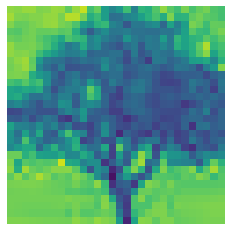

In [10]:
classical_img = Image.open("image/tree_part1.jpg")
classical_img = ImageOps.grayscale(classical_img)
classical_arr = np.asarray(classical_img)
plt.imshow(classical_arr, vmin = 0, vmax=255)
plt.axis('off')
plt.show()

In [7]:
## Check if this function is applicable to regular compress sensing
classical_img = Image.open("image/tree_part1.jpg")
classical_img = ImageOps.grayscale(classical_img)
classical_arr = np.asarray(classical_img)
cn, cm = classical_arr.shape
print(cn, cm)
classical_samp_list = [100, 200, 500] #np.floor (cn * cm * 0.20).astype(int)


30 30


sample at:  100


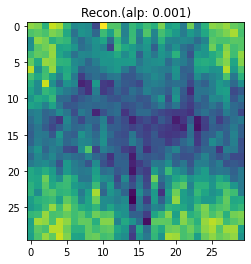

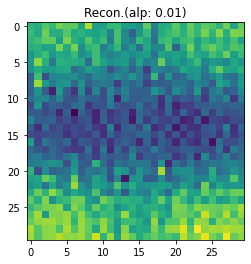

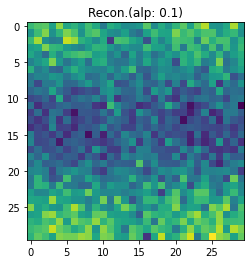

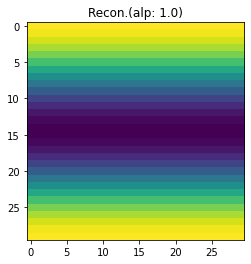

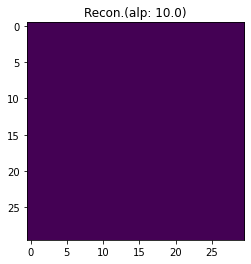

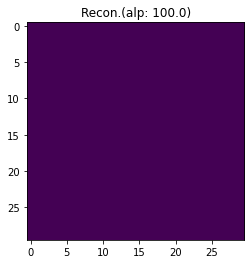

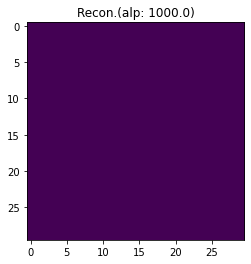

sample at:  200


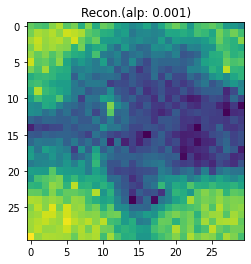

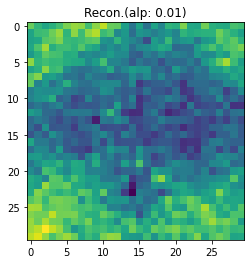

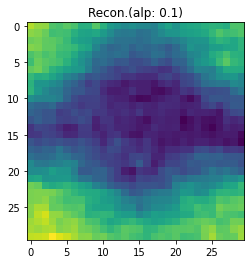

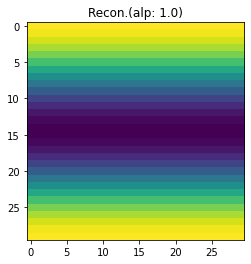

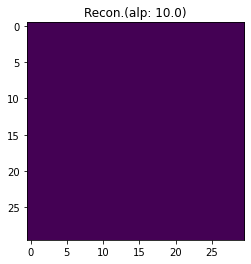

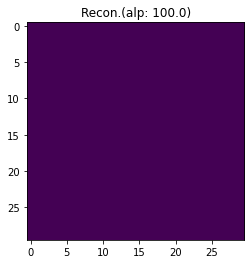

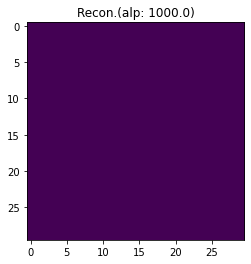

sample at:  500


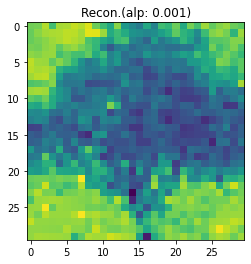

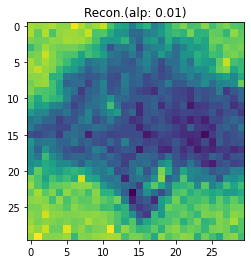

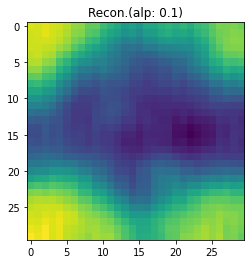

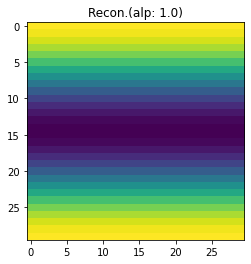

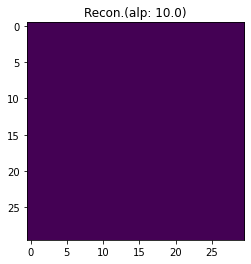

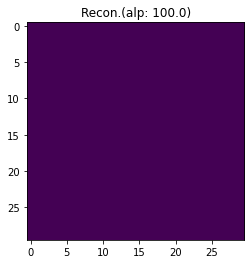

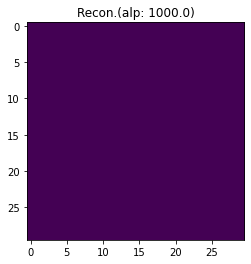

In [17]:
alpha_list = np.logspace(-3, 3, 7)

for classical_samp in classical_samp_list:
    print('sample at: ', classical_samp)
    for alp in alpha_list:
        # Generate random indexes and find corresponding y value for each index
        rand_index = np.random.permutation(cn * cm)[:classical_samp]
        classical_Y = classical_arr.flatten()[rand_index]
        classical_Y = classical_Y.reshape(classical_samp, 1)

        # Generate C matrix
        C = np.eye(cn * cm)[rand_index, :]# * np.sqrt(cn * cm)
        C3D = C.reshape(classical_samp, cn, cm)
        theta, classical_reform, s = compress(C3D, classical_Y, alp)

        plt.imshow(classical_reform)
        plt.title("Recon.(alp: " + str(alp) + ")")
        plt.show()

In [12]:
rand_index = np.random.permutation(cn * cm)[:500]
classical_Y = classical_arr.flatten()[rand_index]
classical_Y = classical_Y.reshape(500, 1)

# Generate C matrix
C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
classical_Y = classical_Y * np.sqrt(cn * cm)
C3D = C.reshape(500, cn, cm)
theta, classical_reform, s = compress(C3D, classical_Y, 0.003)



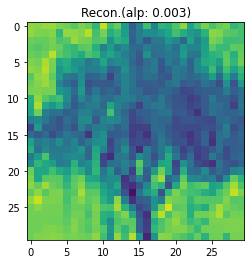

In [13]:
plt.imshow(classical_reform, vmin = 0, vmax = 255)
#plt.clim((0, 255))
plt.title("Recon.(alp: 0.003)")
plt.show()

In [14]:
classical_arr

array([[213, 210, 216, 216, 206, 208, 216, 214, 193, 216, 233, 178, 196,
        141, 117, 134, 176, 112, 167, 160, 186, 213, 190, 177, 203, 182,
        195, 202, 185, 180],
       [220, 206, 204, 208, 208, 214, 215, 204, 228, 227, 203, 159, 174,
        142,  93,  95, 115, 122, 144, 163, 181, 158, 205, 163, 165, 193,
        201, 190, 187, 179],
       [207, 195, 196, 203, 207, 214, 216, 204, 199, 184, 145, 131, 164,
        171, 115, 105,  70, 102, 101, 117, 125,  86, 147, 109, 143, 204,
        196, 176, 195, 194],
       [190, 187, 197, 202, 195, 195, 197, 189, 192, 160, 111,  75, 106,
        124, 100, 101, 108,  96,  96,  93,  93, 100,  99, 117, 146, 189,
        174, 170, 192, 203],
       [198, 194, 200, 202, 190, 180, 169, 152, 183, 172, 167, 112, 129,
        108,  94,  87, 131, 104,  95, 106, 100, 141, 101, 168, 148, 165,
        169, 191, 177, 191],
       [214, 202, 202, 204, 195, 182, 160, 132, 101, 116, 157, 112, 124,
         88,  79,  67,  91, 105,  71, 105, 101, 119,

In [15]:
classical_reform

array([[212.99561764, 209.99909934, 215.99485532, 216.01524177,
        206.00012042, 198.57365376, 188.90183456, 205.12473302,
        198.22077933, 167.41023788, 233.01743127, 177.99663481,
        195.89115554, 140.9733313 ,  73.6674099 , 111.7879849 ,
        175.9784939 , 112.01082684, 166.99198189, 160.00527942,
        185.99536823, 212.96297734, 149.40422076, 176.98391397,
        202.98157405, 181.97054301, 195.03281647, 201.98820044,
        169.04382878, 179.99078943],
       [213.31580793, 206.00843931, 203.99659594, 207.97555492,
        168.74063942, 213.99755092, 212.80535605, 208.1668582 ,
        227.9844544 , 179.66580702, 203.01072543, 158.99007417,
        173.91703573, 141.98529879,  83.53277511, 107.40267952,
        127.39936695, 121.99178806, 136.06819072, 149.43365389,
        177.6252163 , 157.97409617, 137.33664511, 131.40180396,
        165.01619968, 210.92898944, 205.50812337, 190.02164133,
        187.00091155, 178.99575979],
       [196.36846398, 195.0389

In [16]:
error = np.linalg.norm(classical_arr - classical_reform, 'fro') / np.sqrt(cm*cn)
error

19.26109525431276

In [13]:
np.linalg.norm(classical_arr, 'fro') / np.sqrt(cm*cn)

145.78164036210686